# 1. Importação de bibliotecas necessárias

In [ ]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# 2. Monstando Drive e carregando Dados

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Carregamento dos dados
caminho_X_train = '/content/drive/My Drive/X_train.txt'
caminho_y_train = '/content/drive/My Drive/y_train.txt'
caminho_subject_train = '/content/drive/My Drive/subject_train.txt'

# Leitura dos dados
x_train = pd.read_csv(caminho_X_train, delim_whitespace=True, header=None)
y_train = pd.read_csv(caminho_y_train, delim_whitespace=True, header=None, names=['activity'])
subject_train = pd.read_csv(caminho_subject_train, delim_whitespace=True, header=None, names=['subject'])

# 3. Análise Exploratória dos Dados

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from google.colab import drive
drive.mount('/content/drive')

caminho_X_train = '/content/drive/My Drive/X_train.txt'
caminho_y_train = '/content/drive/My Drive/y_train.txt'
caminho_subject_train = '/content/drive/My Drive/subject_train.txt'

x_train = pd.read_csv(caminho_X_train, delim_whitespace=True, header=None)
y_train = pd.read_csv(caminho_y_train, delim_whitespace=True, header=None, names=['activity'])
subject_train = pd.read_csv(caminho_subject_train, delim_whitespace=True, header=None, names=['subject'])

# Correlação entre as variáveis
corr_matrix = x_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

# 4. Pré-processamento de Dados

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from google.colab import drive
drive.mount('/content/drive')

caminho_X_train = '/content/drive/My Drive/X_train.txt'
caminho_y_train = '/content/drive/My Drive/y_train.txt'
caminho_subject_train = '/content/drive/My Drive/subject_train.txt'

x_train = pd.read_csv(caminho_X_train, delim_whitespace=True, header=None)
y_train = pd.read_csv(caminho_y_train, delim_whitespace=True, header=None, names=['activity'])
subject_train = pd.read_csv(caminho_subject_train, delim_whitespace=True, header=None, names=['subject'])

corr_matrix = x_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

# Normalização dos dados
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# 5. Redução de Dimensionalidade

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from google.colab import drive
drive.mount('/content/drive')

caminho_X_train = '/content/drive/My Drive/X_train.txt'
caminho_y_train = '/content/drive/My Drive/y_train.txt'
caminho_subject_train = '/content/drive/My Drive/subject_train.txt'

x_train = pd.read_csv(caminho_X_train, delim_whitespace=True, header=None)
y_train = pd.read_csv(caminho_y_train, delim_whitespace=True, header=None, names=['activity'])
subject_train = pd.read_csv(caminho_subject_train, delim_whitespace=True, header=None, names=['subject'])

corr_matrix = x_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Aplicando PCA para reduzir a dimensionalidade dos dados
explained_variance_threshold = 0.85
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)

# Calculando a variância acumulada explicada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio >= explained_variance_threshold) + 1

# Reduzindo os dados para os componentes principais selecionados
x_train_pca_reduced = x_train_pca[:, :n_components]

# Plotando a variância explicada acumulada
plt.figure(figsize=(12, 8))
plt.plot(explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.axhline(y=explained_variance_threshold, color='r', linestyle='-')
plt.axvline(x=n_components - 1, color='r', linestyle='--', label=f'{n_components} componentes')
plt.title('Variância Explicada Acumulada por PCA')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.legend()
plt.grid()
plt.show()

# 6. Clustering (K-Means)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from google.colab import drive
drive.mount('/content/drive')

caminho_X_train = '/content/drive/My Drive/X_train.txt'
caminho_y_train = '/content/drive/My Drive/y_train.txt'
caminho_subject_train = '/content/drive/My Drive/subject_train.txt'

x_train = pd.read_csv(caminho_X_train, delim_whitespace=True, header=None)
y_train = pd.read_csv(caminho_y_train, delim_whitespace=True, header=None, names=['activity'])
subject_train = pd.read_csv(caminho_subject_train, delim_whitespace=True, header=None, names=['subject'])

corr_matrix = x_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

explained_variance_threshold = 0.85
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio >= explained_variance_threshold) + 1

x_train_pca_reduced = x_train_pca[:, :n_components]

plt.figure(figsize=(12, 8))
plt.plot(explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.axhline(y=explained_variance_threshold, color='r', linestyle='-')
plt.axvline(x=n_components - 1, color='r', linestyle='--', label=f'{n_components} componentes')
plt.title('Variância Explicada Acumulada por PCA')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.legend()
plt.grid()
plt.show()

# Escolhendo o número de clusters com base no método do cotovelo e no Silhouette Score
inertia = []
silhouette_scores = []
cluster_range = range(2, 15)

# Calculando a inércia e o silhouette score para diferentes valores de K
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10, max_iter=300)
    kmeans.fit(x_train_pca_reduced)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x_train_pca_reduced, kmeans.labels_))

# Visualizando os resultados do método do cotovelo e do silhouette score
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico do método do cotovelo
ax[0].bar(cluster_range, inertia, color='b', alpha=0.7)
ax[0].set_title('Cotovelo')
ax[0].set_xlabel('Número de Clusters (K)')
ax[0].set_ylabel('Inércia')
ax[0].grid(axis='y')

# Gráfico do silhouette score
ax[1].bar(cluster_range, silhouette_scores, color='g', alpha=0.7)
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Número de Clusters (K)')
ax[1].set_ylabel('Silhouette Score')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()

# Melhor número de clusters com base no Silhouette Score
best_k = cluster_range[np.argmax(silhouette_scores)]
print(f"Melhor número de clusters (K) baseado no Silhouette Score: {best_k}")

# 7. Aplicação do K-means Final


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from google.colab import drive
drive.mount('/content/drive')

caminho_X_train = '/content/drive/My Drive/X_train.txt'
caminho_y_train = '/content/drive/My Drive/y_train.txt'
caminho_subject_train = '/content/drive/My Drive/subject_train.txt'

x_train = pd.read_csv(caminho_X_train, delim_whitespace=True, header=None)
y_train = pd.read_csv(caminho_y_train, delim_whitespace=True, header=None, names=['activity'])
subject_train = pd.read_csv(caminho_subject_train, delim_whitespace=True, header=None, names=['subject'])

corr_matrix = x_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

explained_variance_threshold = 0.85
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio >= explained_variance_threshold) + 1

x_train_pca_reduced = x_train_pca[:, :n_components]

plt.figure(figsize=(12, 8))
plt.plot(explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.axhline(y=explained_variance_threshold, color='r', linestyle='-')
plt.axvline(x=n_components - 1, color='r', linestyle='--', label=f'{n_components} componentes')
plt.title('Variância Explicada Acumulada por PCA')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.legend()
plt.grid()
plt.show()

inertia = []
silhouette_scores = []
cluster_range = range(2, 15)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10, max_iter=300)
    kmeans.fit(x_train_pca_reduced)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x_train_pca_reduced, kmeans.labels_))

fig, ax = plt.subplots(1, 2, figsize=(16, 7))

ax[0].bar(cluster_range, inertia, color='b', alpha=0.7)
ax[0].set_title('Cotovelo')
ax[0].set_xlabel('Número de Clusters (K)')
ax[0].set_ylabel('Inércia')
ax[0].grid(axis='y')

ax[1].bar(cluster_range, silhouette_scores, color='g', alpha=0.7)
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Número de Clusters (K)')
ax[1].set_ylabel('Silhouette Score')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()

best_k = cluster_range[np.argmax(silhouette_scores)]
print(f"Melhor número de clusters (K) baseado no Silhouette Score: {best_k}")

# Aplicando o K-means com o número de clusters ideal
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=10, max_iter=300)
kmeans_final.fit(x_train_pca_reduced)

# Obtendo as etiquetas dos clusters
clusters = kmeans_final.labels_

# 8. Visualização dos Clusters

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from google.colab import drive
drive.mount('/content/drive')

caminho_X_train = '/content/drive/My Drive/X_train.txt'
caminho_y_train = '/content/drive/My Drive/y_train.txt'
caminho_subject_train = '/content/drive/My Drive/subject_train.txt'

x_train = pd.read_csv(caminho_X_train, delim_whitespace=True, header=None)
y_train = pd.read_csv(caminho_y_train, delim_whitespace=True, header=None, names=['activity'])
subject_train = pd.read_csv(caminho_subject_train, delim_whitespace=True, header=None, names=['subject'])

corr_matrix = x_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

explained_variance_threshold = 0.85
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio >= explained_variance_threshold) + 1

x_train_pca_reduced = x_train_pca[:, :n_components]

plt.figure(figsize=(12, 8))
plt.plot(explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.axhline(y=explained_variance_threshold, color='r', linestyle='-')
plt.axvline(x=n_components - 1, color='r', linestyle='--', label=f'{n_components} componentes')
plt.title('Variância Explicada Acumulada por PCA')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.legend()
plt.grid()
plt.show()

inertia = []
silhouette_scores = []
cluster_range = range(2, 15)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10, max_iter=300)
    kmeans.fit(x_train_pca_reduced)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x_train_pca_reduced, kmeans.labels_))

fig, ax = plt.subplots(1, 2, figsize=(16, 7))

ax[0].bar(cluster_range, inertia, color='b', alpha=0.7)
ax[0].set_title('Cotovelo')
ax[0].set_xlabel('Número de Clusters (K)')
ax[0].set_ylabel('Inércia')
ax[0].grid(axis='y')

ax[1].bar(cluster_range, silhouette_scores, color='g', alpha=0.7)
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Número de Clusters (K)')
ax[1].set_ylabel('Silhouette Score')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()

best_k = cluster_range[np.argmax(silhouette_scores)]
print(f"Melhor número de clusters (K) baseado no Silhouette Score: {best_k}")

kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=10, max_iter=300)
kmeans_final.fit(x_train_pca_reduced)

clusters = kmeans_final.labels_

# Visualizando os clusters em 3D usando PCA
pca_3d = PCA(n_components=3)
x_train_3d = pca_3d.fit_transform(x_train_scaled)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train_3d[:, 0], x_train_3d[:, 1], x_train_3d[:, 2], c=clusters, cmap='viridis', s=10)
ax.set_title('Clusters Formados pelo K-means (Reduzido para 3D)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.show()

# 9. Código Completo e Análise Final dos Clusters

Mounted at /content/drive


<ipython-input-1-acacfc4c0a84>:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  x_train = pd.read_csv(caminho_X_train, delim_whitespace=True, header=None)
<ipython-input-1-acacfc4c0a84>:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(caminho_y_train, delim_whitespace=True, header=None, names=['activity'])
<ipython-input-1-acacfc4c0a84>:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_train = pd.read_csv(caminho_subject_train, delim_whitespace=True, header=None, names=['subject'])


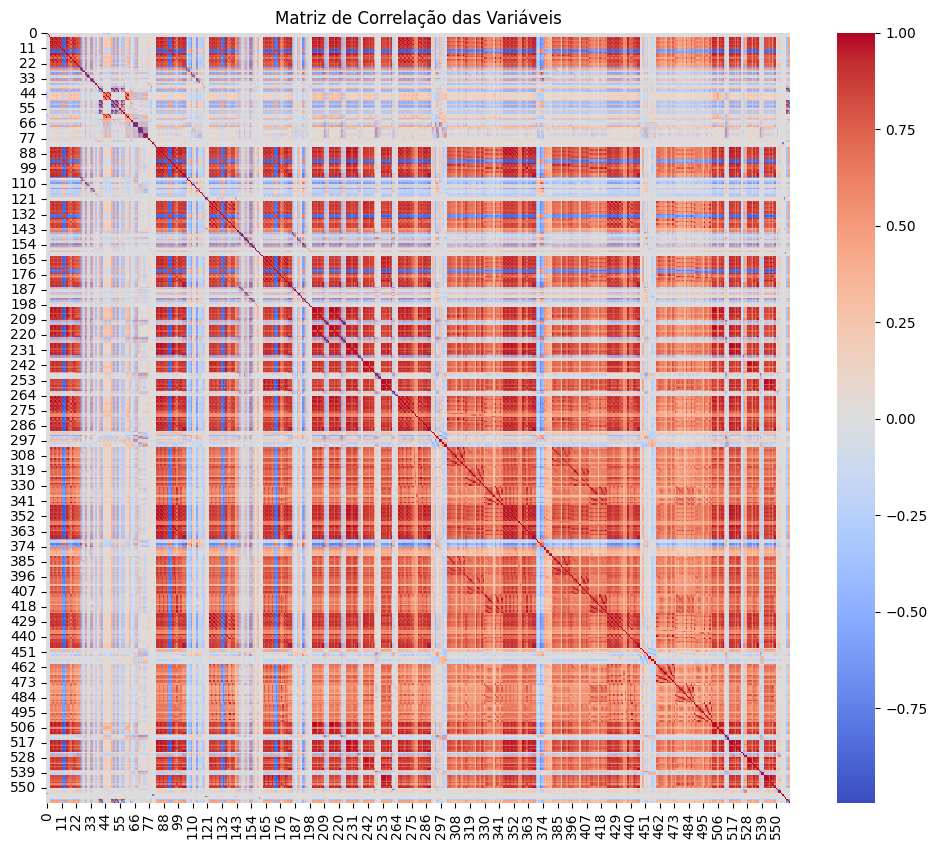

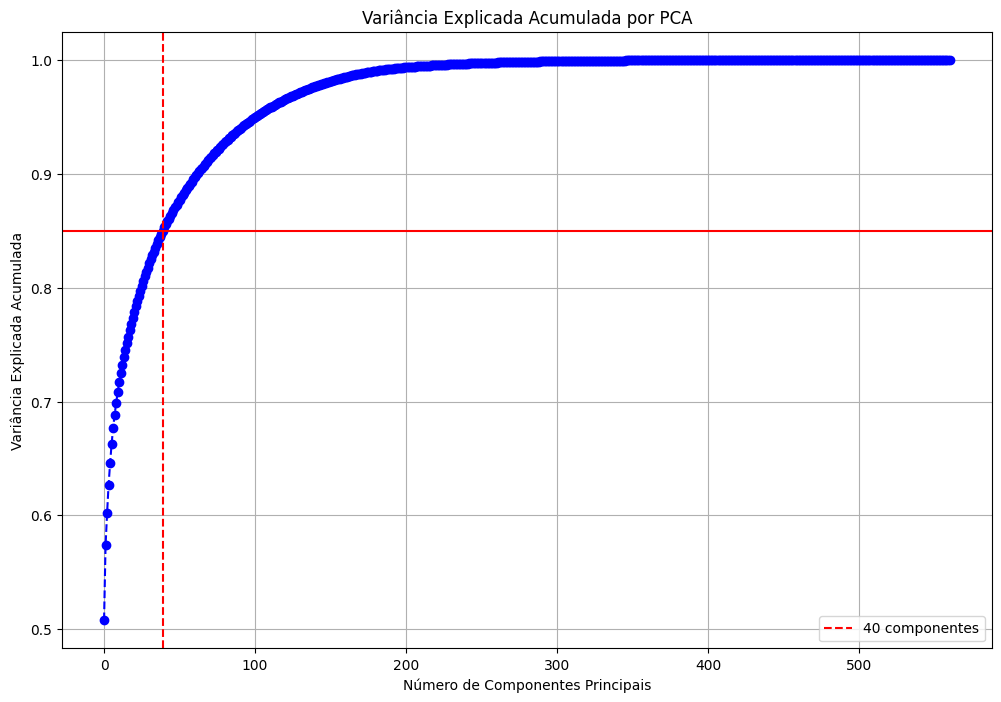

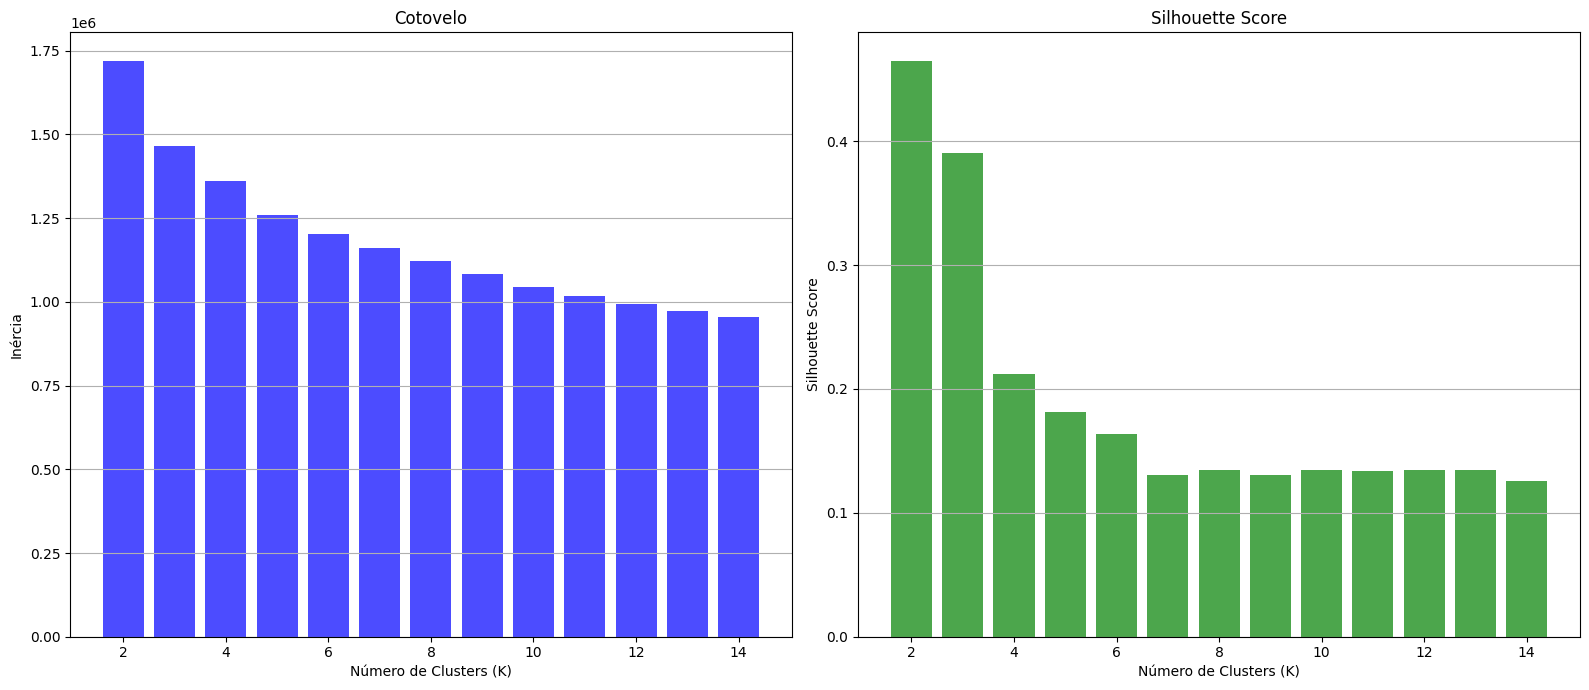

Melhor número de clusters (K) baseado no Silhouette Score: 2


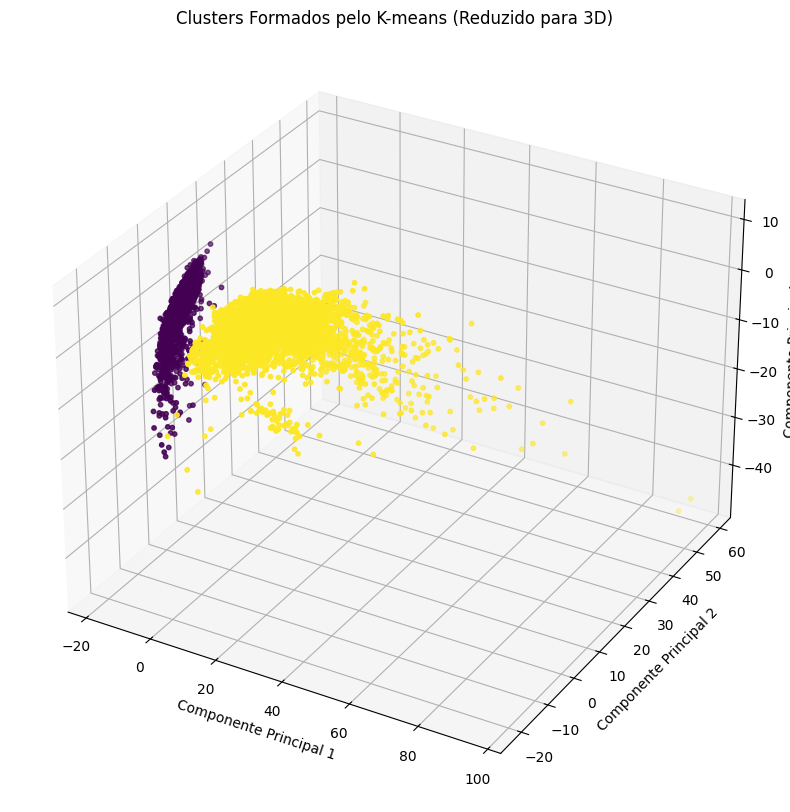

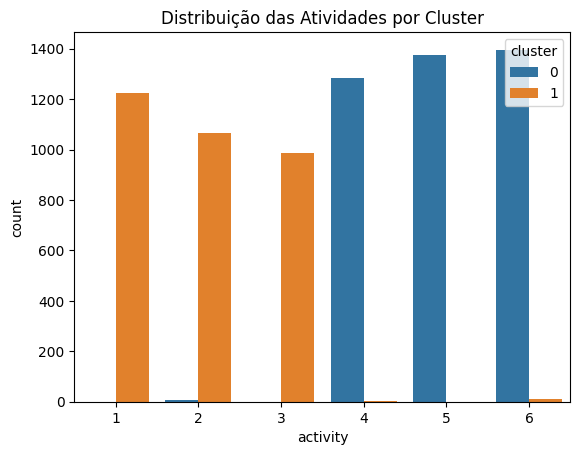

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from google.colab import drive
drive.mount('/content/drive')

caminho_X_train = '/content/drive/My Drive/X_train.txt'
caminho_y_train = '/content/drive/My Drive/y_train.txt'
caminho_subject_train = '/content/drive/My Drive/subject_train.txt'

x_train = pd.read_csv(caminho_X_train, delim_whitespace=True, header=None)
y_train = pd.read_csv(caminho_y_train, delim_whitespace=True, header=None, names=['activity'])
subject_train = pd.read_csv(caminho_subject_train, delim_whitespace=True, header=None, names=['subject'])

corr_matrix = x_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

explained_variance_threshold = 0.85
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio >= explained_variance_threshold) + 1

x_train_pca_reduced = x_train_pca[:, :n_components]

plt.figure(figsize=(12, 8))
plt.plot(explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.axhline(y=explained_variance_threshold, color='r', linestyle='-')
plt.axvline(x=n_components - 1, color='r', linestyle='--', label=f'{n_components} componentes')
plt.title('Variância Explicada Acumulada por PCA')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.legend()
plt.grid()
plt.show()

inertia = []
silhouette_scores = []
cluster_range = range(2, 15)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10, max_iter=300)
    kmeans.fit(x_train_pca_reduced)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(x_train_pca_reduced, kmeans.labels_))

fig, ax = plt.subplots(1, 2, figsize=(16, 7))

ax[0].bar(cluster_range, inertia, color='b', alpha=0.7)
ax[0].set_title('Cotovelo')
ax[0].set_xlabel('Número de Clusters (K)')
ax[0].set_ylabel('Inércia')
ax[0].grid(axis='y')

ax[1].bar(cluster_range, silhouette_scores, color='g', alpha=0.7)
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Número de Clusters (K)')
ax[1].set_ylabel('Silhouette Score')
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()

best_k = cluster_range[np.argmax(silhouette_scores)]
print(f"Melhor número de clusters (K) baseado no Silhouette Score: {best_k}")

kmeans_final = KMeans(n_clusters=best_k, init='k-means++', random_state=42, n_init=10, max_iter=300)
kmeans_final.fit(x_train_pca_reduced)

clusters = kmeans_final.labels_
pca_3d = PCA(n_components=3)
x_train_3d = pca_3d.fit_transform(x_train_scaled)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train_3d[:, 0], x_train_3d[:, 1], x_train_3d[:, 2], c=clusters, cmap='viridis', s=10)
ax.set_title('Clusters Formados pelo K-means (Reduzido para 3D)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.show()

# Analisando a distribuição das atividades por cluster
cluster_df = pd.DataFrame({'activity': y_train['activity'], 'cluster': clusters})
sns.countplot(x='activity', hue='cluster', data=cluster_df)
plt.title('Distribuição das Atividades por Cluster')
plt.show()